In [1]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = snowflake.connector.connect(
    user='YASSIN',
    password='Swedenystad+1',
    account ="HDSCWGU-RH60445",
    database="SPOTIFY_BRIEF",
    schema="SPOTIFY_BRIEF_SCHEMA"
)
cur = conn.cursor()
cur.execute('select * from "spotify_info"')
df = cur.fetch_pandas_all()
conn.close()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int8   
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int8   
 14  loudne

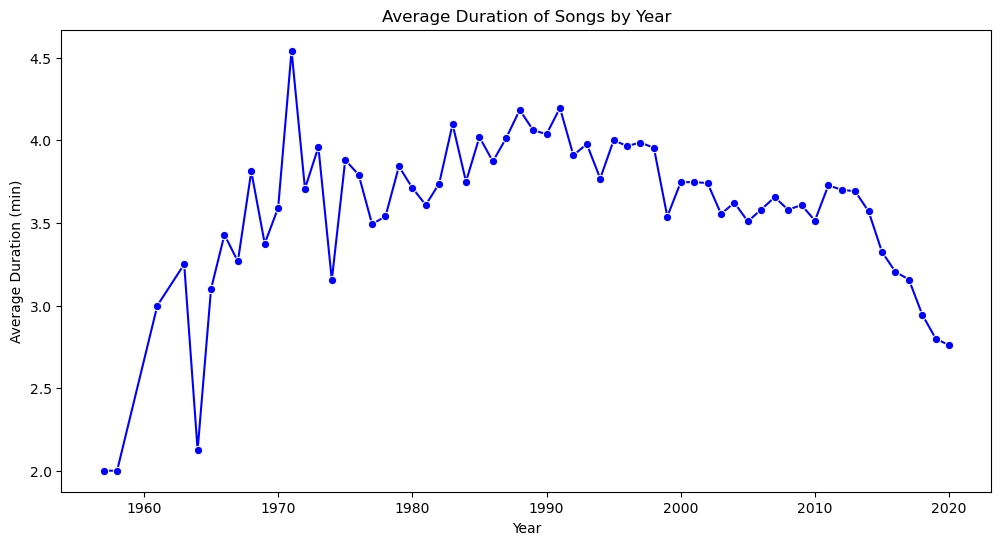

In [5]:
df['track_album_release_date'] = df['track_album_release_date'].fillna('1900-01-01')

# Try to convert to datetime, if not possible, fill with NaN
df['release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Extract the year from the release date
df['release_year'] = df['release_date'].dt.year

# Plot average duration by year
average_duration_by_year = df.groupby('release_year')['duration_min'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=average_duration_by_year.index, y=average_duration_by_year.values, marker='o', color='blue')
plt.title('Average Duration of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (min)')
plt.show()